# Movie Recommender

+ ## Exploratory Data Analysis

In [2]:
# import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import NMF

In [45]:
!pwd

/home/myunix/TahiniTensor/spiced_projects/week10/forGIT


#### Read in the ratings and movies tables

- The data is downloaded from https://grouplens.org/datasets/movielens/. Here smaller dataset i.e. `ml-latest-small.zip` is taken. The folder contains movies ( movieId, title & genres)the rating by the users, tags and links. Only ratings.csv and movies.csv are used.

In [4]:
df_rating = pd.read_csv('WebApp/data/ratings.csv')
df_movies = pd.read_csv('WebApp/data/movies.csv')

---
### Lets understand the data with few questions

#### How many unique users and movies are in the dataset?

In [42]:
print('Total number of movies: ',len(df_movies['movieId'].unique()))

Total number of movies:  9742


In [43]:
print('Total number of unique users: ',len(df_rating['userId'].unique()))

Total number of unique users:  610


#### a) What is the average rating, b) which rating appears the most?

In [10]:
print('Average rating of the movies: ', round(df_rating.rating.mean(),2))

Average rating of the movies:  3.5


In [11]:
print('Rating that appears the most by a user:\n', df_rating.rating.value_counts())

Rating that appears the most by a user:
 4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


#### How are the ratings distributed & What is the percentage of 5 star ratings?

In [12]:
# Rating distribution
df_rating.rating.value_counts(ascending=True)

0.5     1370
1.5     1791
1.0     2811
2.5     5550
2.0     7551
4.5     8551
3.5    13136
5.0    13211
3.0    20047
4.0    26818
Name: rating, dtype: int64

<Axes: title={'center': 'Rating by users'}, xlabel='ratings', ylabel='number of users'>

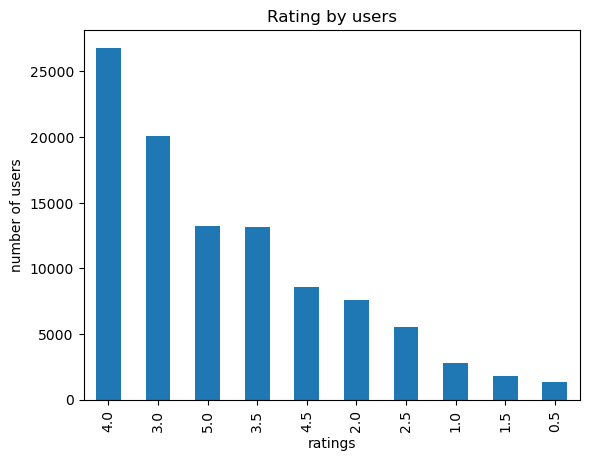

In [13]:
# Plotting the distribution
df_rating.rating.value_counts().plot(kind='bar',title='Rating by users', xlabel='ratings', ylabel='number of users')

In [14]:
# Percentage of 5 stars
print('Percentage of 5 stars given by users: ')
round((df_rating['rating']==5).values.sum() / ((df_rating['rating']==5).values.sum() + (~(df_rating['rating']==5)).values.sum() ) * 100 , 1 )

Percentage of 5 stars given by users: 


13.1

#### Count the number of ratings *per* user

In [15]:
df_rating.groupby('userId')['rating'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

#### How many users have rated more than 20 movies?

In [16]:
((df_rating.groupby('userId')['movieId'].count()) > 20).values.sum()

596

#### What is the *median* number of ratings?

In [17]:
print('max      :', df_rating.groupby('rating')['userId'].count().max())
print('min      :', df_rating.groupby('rating')['userId'].count().min())
print('median   :', df_rating.groupby('rating')['userId'].count().median())

max      : 26818
min      : 1370
median   : 8051.0


#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

<Axes: xlabel='rating', ylabel='Count'>

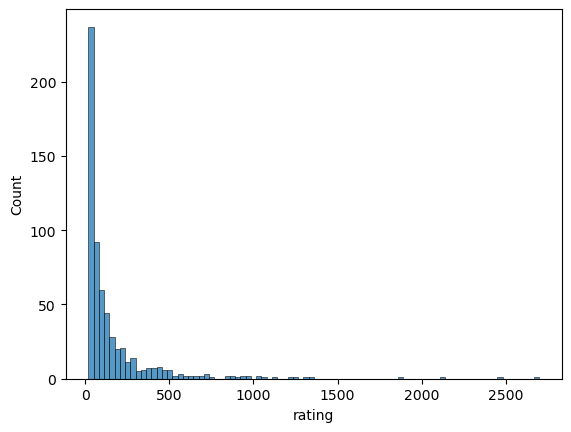

In [18]:
sns.histplot(x=df_rating.groupby('userId')['rating'].count())

#### Calculate the average rating *per user*

In [19]:
df_rating.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

#### Are there any duplicated titles ?

In [20]:
df_movies['movieId'].duplicated().value_counts()

False    9742
Name: movieId, dtype: int64

In [21]:
df_movies['title'][df_movies['title'].duplicated()]     # ???

5601                               Emma (1996)
6932                  War of the Worlds (2005)
9106    Confessions of a Dangerous Mind (2002)
9135                               Eros (2004)
9468                           Saturn 3 (1980)
Name: title, dtype: object

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

In [22]:
df_movies['movieId'].isin(df_rating['movieId']).value_counts()

True     9724
False      18
Name: movieId, dtype: int64

#### Merge the ratings and movies tables together

In [23]:
df_merged = pd.merge(left=df_movies, right=df_rating, on='movieId')
df_merged

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


#### Count the number of ratings per movie title & list the top 10 most rated movies in the dataset?

In [24]:
df_ratmov = pd.merge(df_rating, df_movies, on='movieId', how='inner')
df_ratmov

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [25]:
df_ratmov.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

#### Calculate the average rating per movie title!

In [26]:
df_ratmov.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [28]:
# Save the df_ratmov to a csv file

df_ratmov.to_csv('savedFiles/ratmov.csv', sep=';')

#### Create the NMF model

In [29]:
df_ratmov = pd.read_csv('savedFiles/ratmov.csv', sep=';')
print('Shape',df_ratmov.shape)
df_ratmov.head(10)

Shape (100836, 7)


,Unnamed: 0,userId,movieId,rating,timestamp,title,genres
0,0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [30]:
df_piv = df_ratmov[['title','rating','userId']].pivot_table(index='userId', columns='title', values='rating')

In [31]:
print('Shape of df_piv',df_piv.shape)
df_piv.head(5)

Shape of df_piv (610, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Fill the NaN values with mean values of each user

df_piv = df_piv.fillna(df_piv.mean())

In [33]:
df_piv.tail(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
607,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
608,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,4.500000,3.500000,2.0,3.134615,1.0
609,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
610,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.500000,3.285714,...,1.5,4.0000,3.500000,3.0,3.0,3.863636,2.000000,1.5,3.134615,1.0


In [34]:
# Mean rating for each movies 
mean_movies = df_piv.mean()

In [35]:
mean_movies

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Length: 9719, dtype: float64

In [36]:
mean_movies.shape

(9719,)

In [37]:
# Save the mean_movies to a pickle file

with open('savedFiles/mean_movies.pkl',mode='wb') as file:
    pickle.dump(mean_movies,file)

In [38]:
# Create Model 

nmf_MovieModel = NMF(n_components=50, max_iter=200)     # Instatiate the NMF model*

nmf_MovieModel.fit(df_piv)       # Rating = df_rating , movies = df_movies , dfratmov = rating and movies, 
                            # Fit the model on the full imputed user/movie dataframe/matrix

NMF(n_components=50)

In [39]:
# Save the model

with open('savedFiles/nmf_MovieModel.pkl',mode='wb') as file:
    pickle.dump(nmf_MovieModel,file)

In [40]:
# # Open the Model
# with open('nmf_MovieModel.pkl','rb') as file:
#     loaded_MovieModel = pickle.load(file)